In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import editdistance
from itertools import product

In [3]:
AngTextPath = '../data/AngOrdtext'
AngDatePath = '../data/AngOrddate'
AngIDPath = '../data/AngOrdID'
EngTextPath = '../data/EngOrdtext'
EngDatePath = '../data/EngOrddate'


In [4]:
def read_text_data(filepath):    
    sentences = []
    for line in open(filepath):
        words = line.split()
        sentence = [word for word in words]
        sentences.append(sentence)
    return sentences

def read_data(filepath):
    all_words = []
    for line in open(filepath):
        words = line.split()
        sentence = [word for word in words]
        all_words.extend(sentence)
    return all_words



# Word count by date

In [5]:
ang_text = read_text_data(AngTextPath)
ang_date = read_data(AngDatePath)
ang_id = read_data(AngIDPath)

In [6]:
ang_text_count = len(ang_text)
ang_date_count = len(ang_date)
ang_id_count = len(ang_id)
print('Ang text count:', ang_text_count)
print('Ang date count:', ang_date_count)
print('Ang id count:', ang_id_count)

Ang text count: 1432
Ang date count: 1432
Ang id count: 1432


In [7]:
ang_df = pd.DataFrame({'Text': ang_text,
                        'Date': ang_date,
                        'ID': ang_id})
ang_df['Text'] = ang_df['Text'].apply(lambda x: ' '.join(x))
ang_df['WordCount'] = ang_df['Text'].apply(lambda x: len(x.split()))
ang_df['Date'] = ang_df['Date'].astype(int)


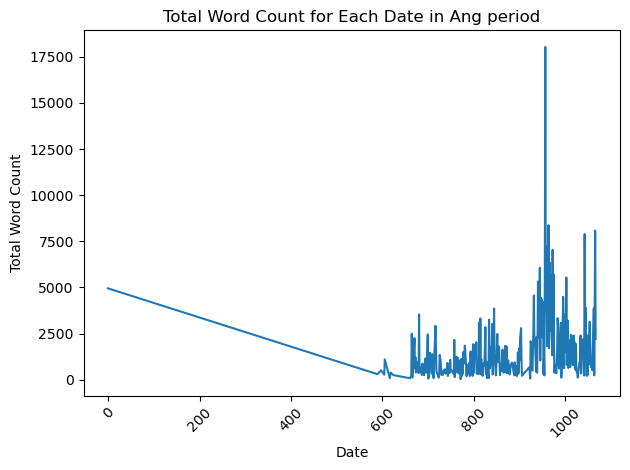

In [8]:
date_wordcount = ang_df.groupby('Date')['WordCount'].sum()

# Creating a line plot
date_wordcount.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Word Count')
plt.title('Total Word Count for Each Date in Ang period')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Word count by date in Ang period

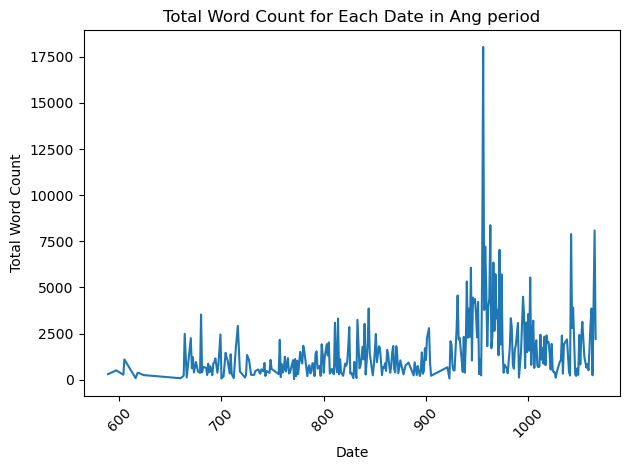

In [9]:
filtered_df = ang_df[ang_df['Date'] != 0]
date_wordcount = filtered_df.groupby('Date')['WordCount'].sum()

# Creating a line plot
date_wordcount.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Word Count')
plt.title('Total Word Count for Each Date in Ang period')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

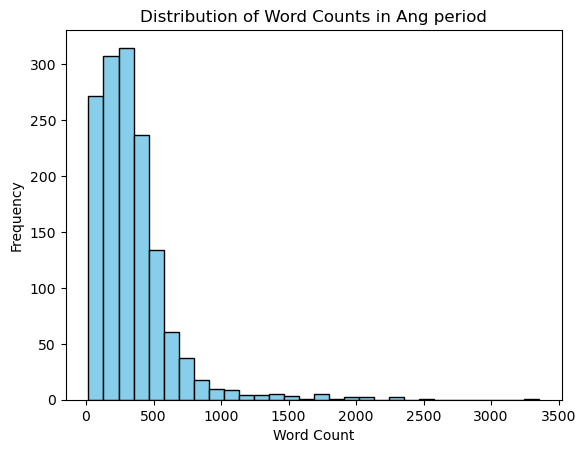

In [10]:
wordcounts = ang_df['WordCount']

# Creating a histogram
plt.hist(wordcounts, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Ang period')
plt.show()

In [11]:
eng_text = read_text_data(EngTextPath)
eng_date = read_data(EngDatePath)

eng_data = {'Text': eng_text,
        'Date': eng_date}
eng_df = pd.DataFrame(eng_data)
eng_df['Text'] = eng_df['Text'].apply(lambda x: ' '.join(x))
eng_df['WordCount'] = eng_df['Text'].apply(lambda x: len(x.split()))
eng_df.head()

,Text,Date,WordCount
0,oportet nos quos deus prefecit temporaliter re...,1060,381
1,hee sunt diuisiones terarum quas eadwardus rex...,1061,116
2,in nomine domini nostri iesu cristi saluatoris...,1062,697
3,diuine prospectionis qua reguntur omnia conflu...,1063,236
4,quecunque scripta sunt dicit apostolus ad nost...,1065,641


## Word count by date in Eng period

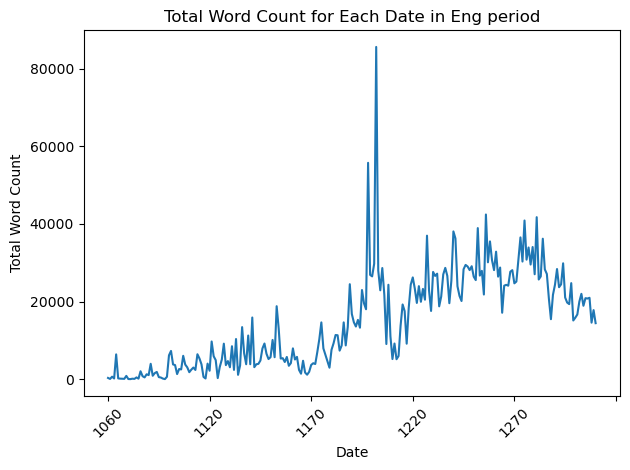

In [12]:
date_wordcount = eng_df.groupby('Date')['WordCount'].sum()

# Creating a bar plot
date_wordcount.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Word Count')
plt.title('Total Word Count for Each Date in Eng period')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

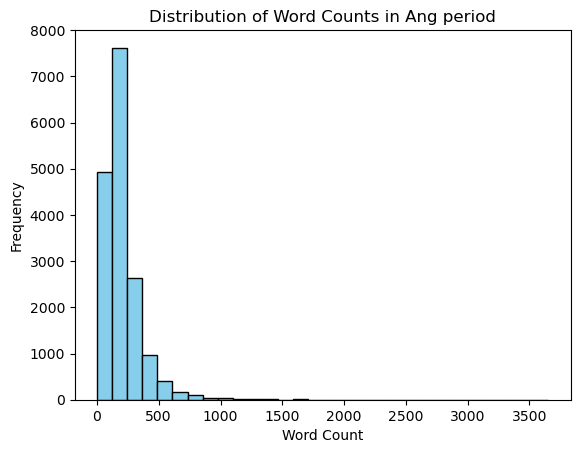

In [13]:
wordcounts = eng_df['WordCount']

# Creating a histogram
plt.hist(wordcounts, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Ang period')
plt.show()

# Token count

In [14]:
def get_word_count(sentences):
    all_words = [word for sentence in sentences for word in sentence]
    word_count = len(all_words)
    distinct_word_count = len(set(all_words))
    return all_words, word_count, distinct_word_count

ang_all_words, ang_text_count, ang_distinct_text_count = get_word_count(ang_text)
print('Ang text count:', ang_text_count)
print('Ang distinct text count:', ang_distinct_text_count)

eng_all_words, eng_text_count, eng_distinct_text_count = get_word_count(eng_text)
print('Eng text count:', eng_text_count)
print('Eng distinct text count:', eng_distinct_text_count)

Ang text count: 488612
Ang distinct text count: 60575
Eng text count: 3564443
Eng distinct text count: 111999


In [15]:
def get_rank_frequency(all_words):
    word_frequency = {}
    for word in all_words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    word_frequency = dict(sorted(word_frequency.items(), key=lambda item: item[1], reverse=True))
    word_frequency = pd.DataFrame(list(word_frequency.items()), columns=['Word', 'Frequency'])
    return word_frequency

ang_word_frequency = get_rank_frequency(ang_all_words)
eng_word_frequency = get_rank_frequency(eng_all_words)

In [16]:
eng_word_frequency.head(10)

,Word,Frequency
0,et,270198
1,de,144916
2,in,98943
3,ad,41093
4,quod,33962
5,cum,27941
6,uel,21675
7,pro,21305
8,eclesie,20838
9,suis,20582


In [17]:
len(eng_word_frequency[eng_word_frequency['Frequency'] > 1000])

547

# Intersection

In [18]:
ang_words_set = set(ang_word_frequency['Word'])
eng_words_set = set(eng_word_frequency['Word'])

common_words = ang_words_set.intersection(eng_words_set)

common_words_list = list(common_words)

len(common_words_list)

13961

In [19]:
common_words_list[:10]

['confirmatio',
 'limam',
 'misericordiam',
 'lade',
 'metropolitanus',
 'mercatos',
 'criminibus',
 'desistens',
 'haud',
 'aureus']

# Intersection on specified period
ang: 900 - 1066

norman: 1067 - 1198

In [27]:
ang_df['Date'] = ang_df['Date'].astype(int)
eng_df['Date'] = eng_df['Date'].astype(int)

ang_spe_df = ang_df[(ang_df['Date'] >= 900) & (ang_df['Date'] <= 1066)]
eng_spe_df = eng_df[(eng_df['Date'] >= 1067) & (eng_df['Date'] <= 1198)]

In [21]:
# some mistakes, but it's fun to mention them
ang_spe_all_letters,_, ang_spe_distinct_letter_count = get_word_count(ang_spe_df['Text'])
eng_spe_all_letters,_, eng_spe_distinct_letter_count = get_word_count(eng_spe_df['Text'])
print('Ang distinct letter count:', ang_spe_distinct_letter_count)
print('Eng distinct letter count:', eng_spe_distinct_letter_count)

Ang distinct letter count: 31
Eng distinct letter count: 24


In [28]:
ang_spe_df_text = ang_spe_df['Text'].astype(str)
eng_spe_df_text = eng_spe_df['Text'].astype(str)


# Tokenize text and gather words into a list
ang_spec_all_words = []
for text in ang_spe_df_text:
    tokens = text.split()
    ang_spec_all_words.extend(tokens)

eng_spec_all_words = []
for text in eng_spe_df_text:
    tokens = text.split()
    eng_spec_all_words.extend(tokens)

# Example of the first 10 words
print(ang_spec_all_words[:10])
print(eng_spec_all_words[:10])

['omnipotentia', 'diuine', 'maiestatis', 'ubique', 'presidente', 'et', 'sine', 'fine', 'cuncta', 'gubernante']
['wilelmus', 'rex', 'anglie', 'omnibus', 'ministris', 'et', 'fidelibus', 'suis', 'francis', 'et']


In [29]:
print("Ang", len(ang_spec_all_words))
print("Eng", len(eng_spec_all_words))
print("Ang set", len(set(ang_spec_all_words)))
print("Eng set", len(set(eng_spec_all_words)))

Ang 321818
Eng 756696
Ang set 43384
Eng set 46054


In [31]:
ang_spe_rank_frequency = get_rank_frequency(ang_spec_all_words)
eng_spe_rank_frequency = get_rank_frequency(eng_spec_all_words)

ang_spe_words_set = set(ang_spe_rank_frequency['Word'])
eng_spe_words_set = set(eng_spe_rank_frequency['Word'])
print("distinct ang word length", len(ang_spe_words_set))
print("distinct eng word length", len(eng_spe_words_set))

common_words_spe = ang_spe_words_set.intersection(eng_spe_words_set)

common_words_list_spe = list(common_words_spe)


print("common word length", len(common_words_list_spe))

distinct ang word length 43384
distinct eng word length 46054
common word length 7940


In [23]:
common_words_list_spe[:10]

['ministerio',
 'bodesham',
 'finibus',
 'paludes',
 'probat',
 'trotescliue',
 'suorumque',
 'dicens',
 'mortuus',
 'astutia']

# Standardize words based on edit distance

In [24]:
print(editdistance.eval('kitten', 'sitting'))
print(len(ang_spe_words_set))

3
43384


In [26]:
ang_spe_words_list = list(ang_spe_words_set)

In [30]:
test_df = pd.DataFrame(set(product(ang_spe_words_list[:100], repeat=2)), columns=['Word1', 'Word2'])
test_df['Distance'] = test_df.apply(lambda x: editdistance.eval(x['Word1'], x['Word2']), axis=1)
test_df = test_df[test_df['Distance'] != 0]
test_df.sort_values(by='Distance', ascending=True).head(10)

,Word1,Word2,Distance
6494,him,hir,1
5656,hir,him,1
2034,ther,hir,2
771,lahes,liues,2
3027,liues,lahes,2
8974,him,bið,2
2540,deues,liues,2
186,hir,ther,2
5585,dominam,dominii,2
4613,dominii,dominam,2


In [ ]:
# Convert the list of dictionaries to a DataFrame
ang_edit_distances_df = pd.DataFrame(set(product(ang_spe_words_set, repeat = 2)), columns=['Word1', 'Word2'])
ang_edit_distances_df['EditDistance'] = ang_edit_distances_df.apply(lambda row: editdistance.eval(row['Word1'], row['Word2']), axis=1)
ang_edit_distances_df = ang_edit_distances_df[ang_edit_distances_df['EditDistance'] != 0]
ang_edit_distances_df = ang_edit_distances_df.sort_values(by='EditDistance', ascending=True)

# Display the dataframe
print(ang_edit_distances_df.head(10))


NameError: name 'pd' is not defined

In [ ]:
eng_edit_distances_df = pd.DataFrame(set(product(eng_spe_words_set, repeat = 2)), columns=['Word1', 'Word2'])
eng_edit_distances_df['EditDistance'] = eng_edit_distances_df.apply(lambda row: editdistance.eval(row['Word1'], row['Word2']), axis=1)
eng_edit_distances_df = eng_edit_distances_df[eng_edit_distances_df['EditDistance'] != 0]
eng_edit_distances_df = eng_edit_distances_df.sort_values(by='EditDistance', ascending=True)

# Display the dataframe
print(eng_edit_distances_df.head(10))